In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('E:\\Datatrained\\Castpone project\\Phase 3\\data_frame.csv')
df

,STATE,DISTRICT,years,max_murder
0,ANDHRA PRADESH,ADILABAD,2001,101
1,ANDHRA PRADESH,ANANTAPUR,2001,151
2,ANDHRA PRADESH,CUDDAPAH,2001,80
3,ANDHRA PRADESH,EAST GODAVARI,2001,82
4,ANDHRA PRADESH,GUNTAKAL RLY.,2001,3
...,...,...,...,...
266,DELHI UT,DELHI UT TOTAL,2011,543
267,BIHAR,PATNA,2012,356
268,MAHARASHTRA,MUMBAI COMMR.,2012,215
269,WEST BENGAL,MURSHIDABAD,2012,174


In [5]:
df.columns

Index(['STATE', 'DISTRICT', 'years', 'max_murder'], dtype='object')

In [6]:
# analyas  analyze districts that appear 3 or more than 3 years
dff = df.groupby('DISTRICT')['years'].count().sort_values(ascending=False).reset_index()
dff

,DISTRICT,years
0,DELHI UT TOTAL,12
1,PATNA,12
2,BANGALORE COMMR.,7
3,24 PARGANAS NORTH,6
4,MEERUT,6
...,...,...
166,JAMUI,1
167,JANJGIR,1
168,JEHANABAD,1
169,JHABUA,1


In [9]:
dff = dff.rename(columns = {'years':'no of years'})

In [10]:
dff

,DISTRICT,no of years
0,DELHI UT TOTAL,12
1,PATNA,12
2,BANGALORE COMMR.,7
3,24 PARGANAS NORTH,6
4,MEERUT,6
...,...,...
166,JAMUI,1
167,JANJGIR,1
168,JEHANABAD,1
169,JHABUA,1


In [15]:
df_final = pd.merge(df ,dff , on = 'DISTRICT' )
df_final

,STATE,DISTRICT,years,max_murder,no of years
0,ANDHRA PRADESH,ADILABAD,2001,101,1
1,ANDHRA PRADESH,ANANTAPUR,2001,151,3
2,ANDHRA PRADESH,ANANTAPUR,2003,173,3
3,ANDHRA PRADESH,ANANTAPUR,2006,184,3
4,ANDHRA PRADESH,CUDDAPAH,2001,80,1
...,...,...,...,...,...
266,MAHARASHTRA,MUMBAI COMMR.,2012,215,2
267,WEST BENGAL,24 PARGANAS SOUTH,2010,263,2
268,WEST BENGAL,24 PARGANAS SOUTH,2011,247,2
269,WEST BENGAL,PASCHIM MIDNAPUR,2010,268,1


In [19]:
# Print the corresponding state/ut, district, murders, and year in descending order
corres = df_final.sort_values(by='no of years' , ascending = False)
corres

,STATE,DISTRICT,years,max_murder,no of years
257,DELHI UT,DELHI UT TOTAL,2012,521,12
102,BIHAR,PATNA,2006,338,12
99,BIHAR,PATNA,2003,484,12
97,BIHAR,PATNA,2001,434,12
256,DELHI UT,DELHI UT TOTAL,2011,543,12
...,...,...,...,...,...
116,CHHATTISGARH,DANTEWARA,2001,83,1
117,CHHATTISGARH,DHAMTARI,2001,14,1
118,CHHATTISGARH,DURG,2001,76,1
119,CHHATTISGARH,JANJGIR,2001,48,1


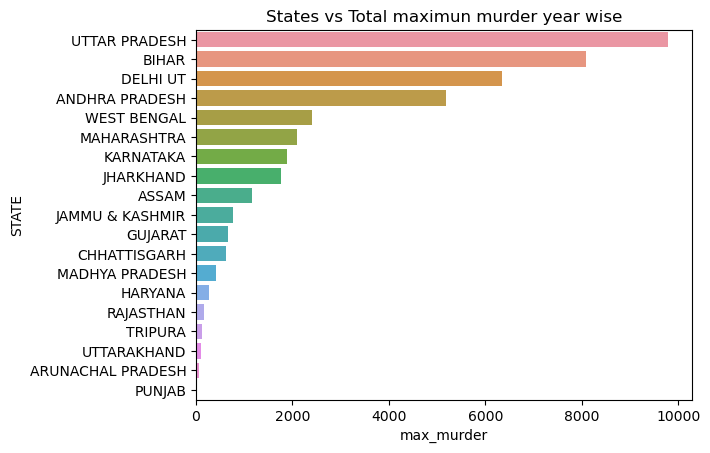

In [33]:
dtt = corres.groupby('STATE')['max_murder'].sum().sort_values(ascending = False).reset_index()
sns.barplot(y=dtt['STATE'] , x=dtt['max_murder'])
plt.title('States vs Total maximun murder year wise')
plt.show()

state UTTAR PRADESH git the maximum accumulative murder crimes along the last decade while PUNJAB got the lowest number of murder crimes